<a href="https://colab.research.google.com/github/Madhusudan2005/ElevateLabs-Task8/blob/main/ElevateLabs_Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset from the uploaded CSV file
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataframe
print("Dataset Head:")
print(df.head())

# Select relevant features for clustering
# We will use Annual Income and Spending Score
# Note: Ensure the column names match exactly with your CSV file.
# If they are different, you'll need to adjust them here.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# It's a good practice to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData from your file selected and scaled successfully.")

Dataset Head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data from your file selected and scaled successfully.


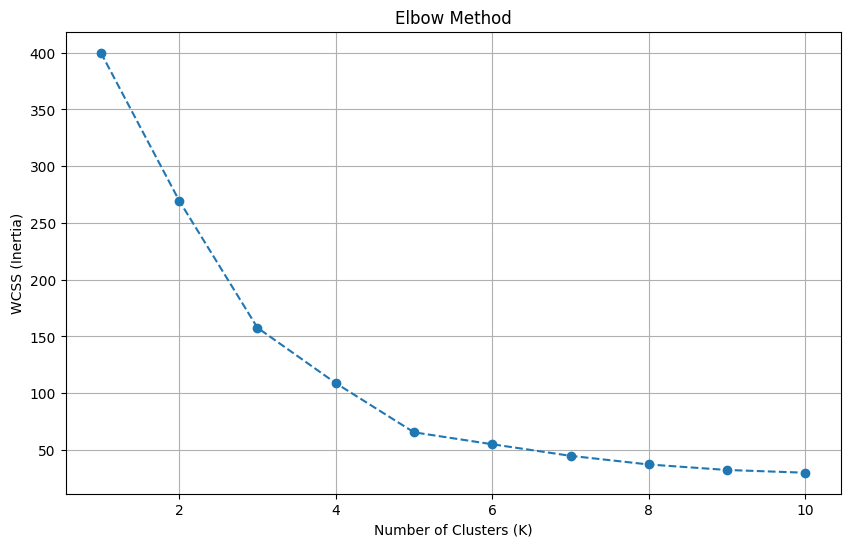

In [3]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [4]:
# Training the K-Means model with the optimal number of clusters (K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the clusters
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

print("K-Means model fitted and cluster labels assigned.")
print("\nFirst 10 rows with cluster labels:")
print(df.head(10))

K-Means model fitted and cluster labels assigned.

First 10 rows with cluster labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6       

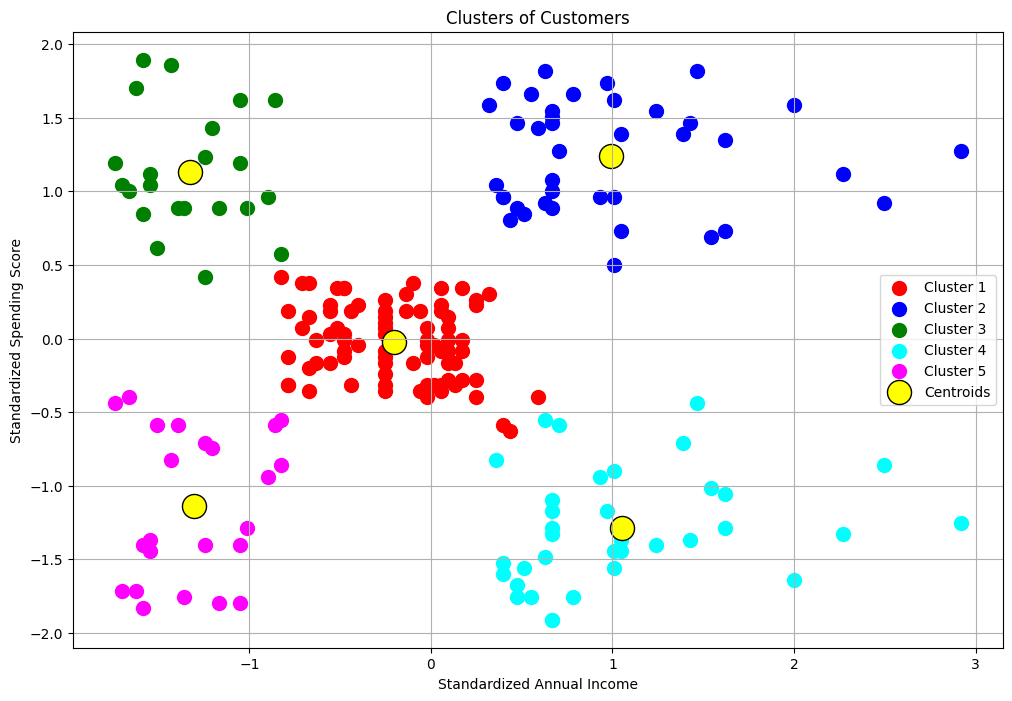

In [5]:
# Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for each cluster
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('Clusters of Customers')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Calculate the Silhouette Score
score = silhouette_score(X_scaled, y_kmeans)

print(f"Silhouette Score for K={optimal_k}: {score:.4f}")

Silhouette Score for K=5: 0.5547
